In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
#   Convert RGB images to CIE-LAB Color File

from __future__ import print_function
import argparse
import os

import numpy as np
import pickle
from keras.preprocessing.image import list_pictures, array_to_img
from image_ext import list_pictures_in_multidir, load_imgs_asarray, img_dice_coeff

np.random.seed(2016)

/home/nakazawa_atsushi/anaconda3/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nakazawa_atsushi/anaconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def load_fnames(paths):
    f = open(paths)
    data1 = f.read()
    f.close()
    lines = data1.split('\n')
    #print(len(lines))
    # 最終行は空行なので消す
    del(lines[len(lines)-1])
    #print(len(lines))
    return lines

In [3]:
def make_fnames(fnames,fpath,fpath_mask,mask_ext):
    fnames_img = [];
    fnames_mask= [];
    
    for i in range(len(fnames)):
        fnames_img.append(fpath + '/' + fnames[i]);
        fnames_mask.append(fpath_mask + '/' + mask_ext + fnames[i]);
        
    return [fnames_img,fnames_mask]

In [4]:
def RGB2RGChroma(img):
    # convert RGB to RG Chromaticity Image
    # https://en.wikipedia.org/wiki/Rg_chromaticity
    ret = np.zeros((img.shape[0],img.shape[1],img.shape[2]),'float')
    
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    I = R + G + B + 1
    r = (R+1)/I
    g = (G+1)/I
    b = (B+1)/I
    R2 = r*G / g
    B2 = ((1 - r - g)*G) / g
    
    ret[:,:,0] = r
    ret[:,:,1] = g
    ret[:,:,2] = 0
    
    return ret

In [5]:
def LabConversion(img):
    # https://www.pyimagesearch.com/2014/06/30/super-fast-color-transfer-images/
    ret = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2LAB)
    #ret[:,:,2] = ret[:,:,2]
    #ret = cv2.cvtColor(ret, cv2.COLOR_LAB2RGB);
    #ret = np.clip(ret,0,255)
    
    return ret

In [10]:
#
#  MAIN STARTS FROM HERE
#
if __name__ == '__main__':
    
    target_size = (224, 224)
    dim_ordering = 'channels_last'
    
    fnames = load_fnames('data.nnlab/list_files_all.txt')
    [fpaths_xs_train,fpaths_ys_train] = make_fnames(fnames,'data.nnlab/image','data.nnlab/gt','')
    [fpaths_xs_out,fpaths_ys_out] = make_fnames(fnames,'data.nnlab.LAB/img','data.nnlab/gt','')
    
    if os.path.exists('data.nnlab.LAB') == 0:
        os.mkdir('data.nnlab.LAB')
        os.mkdir('data.nnlab.LAB/img')

    X_img = load_imgs_asarray(fpaths_xs_train, grayscale=False, target_size=target_size,
                                dim_ordering=dim_ordering)

In [11]:
    print(X_img.shape)

(83, 224, 224, 3)


In [12]:
    import cv2
    
    for i in range(X_img.shape[0]):
        print(fpaths_xs_train[i])
        print(fpaths_xs_out[i])
        
        LAB = LabConversion(X_img[i])
        cv2.imwrite(fpaths_xs_out[i],LAB)
        

data.nnlab/image/fujiwara0218.png
data.nnlab.LAB/img/fujiwara0218.png
data.nnlab/image/fujiwara0285.png
data.nnlab.LAB/img/fujiwara0285.png
data.nnlab/image/fujiwara0325.png
data.nnlab.LAB/img/fujiwara0325.png
data.nnlab/image/fujiwara0381.png
data.nnlab.LAB/img/fujiwara0381.png
data.nnlab/image/fujiwara0469.png
data.nnlab.LAB/img/fujiwara0469.png
data.nnlab/image/fujiwara0509.png
data.nnlab.LAB/img/fujiwara0509.png
data.nnlab/image/fujiwara0565.png
data.nnlab.LAB/img/fujiwara0565.png
data.nnlab/image/fujiwara0621.png
data.nnlab.LAB/img/fujiwara0621.png
data.nnlab/image/fujiwara0702.png
data.nnlab.LAB/img/fujiwara0702.png
data.nnlab/image/fujiwara0757.png
data.nnlab.LAB/img/fujiwara0757.png
data.nnlab/image/fujiwara0845.png
data.nnlab.LAB/img/fujiwara0845.png
data.nnlab/image/fujiwara0892.png
data.nnlab.LAB/img/fujiwara0892.png
data.nnlab/image/higuchi0214.png
data.nnlab.LAB/img/higuchi0214.png
data.nnlab/image/higuchi0267.png
data.nnlab.LAB/img/higuchi0267.png
data.nnlab/image/higuchi

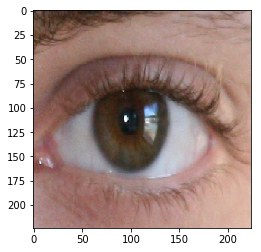

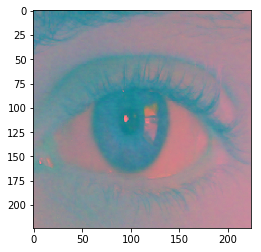

In [169]:
#    import matplotlib.pyplot as plt
#    import cv2
    
#    plt.imshow(X_train[1]/255)
#    plt.show()
#    
#    CH = LabConversion(X_train[1])
#    
#    plt.imshow(CH/255)    
    #表示
#    plt.show()